In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def loss(vecx, c=np.array([[2],[3]]), m=np.array([[2.5], [1.5]])):
    assert vecx.shape[0] == 2
    d = vecx - c
    return np.sum(m * d * d)

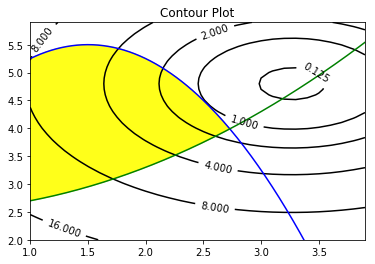

In [3]:
X = np.arange(1, 4, 0.1)
Y = np.arange(2, 6, 0.1)
X, Y = np.meshgrid(X, Y)
nR, nC = X.shape
Z = np.array([[loss(np.array([[X[r,c]],[Y[r,c]]]), c=np.array([[3.27],[4.8]]), m=np.array([[1.5], [1.5]]))
                      for c in range(nC)] for r in range(nR)])

plt.figure()
levels = np.array([0.125, 1, 2, 4, 8, 16, 32])
CS = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(CS, inline=0.5, fontsize=10)
plt.title('Contour Plot')

xminmax = np.min(X), np.max(X)
yminmax = np.min(Y), np.max(Y)

g1 = lambda x: -(x-1.5)**2 + 5.5
g2 = lambda x: 0.2*x**2 + 2.5

x = np.linspace(1, 4, 200)
plt.plot(x, g1(x), 'b')
plt.plot(x, g2(x), 'g')

n = np.sum(g1(x) >= g2(x))
xregion = np.hstack((x[:n],x[n::-1]))
yregion = np.hstack((g1(x[:n]), g2(x[n::-1])))

plt.fill(xregion, yregion, color=(1, 1, 0.1)) 
# plt.plot(x[:n], g1(x[:n]), 'b', linewidth=5)
# plt.plot(x[:n], g1(x[:n]), 'c', linewidth=5)


plt.xlim(xminmax)
plt.ylim(yminmax)
plt.show()


Find solution with GD

In [4]:
def gd(grad, v0, g=None, step_size = 0.01, Nmax = 1000, tol = 1e-6):
    '''
    grad: gradient function
    v0: initial value
    g: objective function
    '''

    if g is None:
        g = lambda v: 0
    
    losses = []
    v = v0
    gradv = grad(v)
    
    for i in range(Nmax):
        v = v - step_size * gradv
        gradv = grad(v)
        
        loss = g(v)
        losses.append(loss)

        eps = np.linalg.norm(gradv)
        if  eps <= tol:
            print('Reach termination criteria at i={} with {:.7f}'.format(i, eps))
            break

    return v, losses

In [6]:
def check_g1(x):
    check = x[1,0] + (x[0,0] - 1.5)**2 - 5.5
    return check

def check_g2(x):
    check = -x[1,0] + 0.2*x[0,0]**2 + 2.5
    return check

In [7]:
def dPenalized_g1(x):
    check = x[1,0] + (x[0,0] - 1.5)**2 - 5.5
    dP = (check > 0) * np.array([[2*(x[0,0]-1.5)],[1]])
    return dP

In [8]:
def dPenalized_g2(x):
    check = -x[1,0] + 0.2*x[0,0]**2 + 2.5
    dP = (check > 0) * np.array([[0.4*x[0,0]],[-1]])
    return dP

# Case 1

In [9]:
f = lambda x: loss(x, c=np.array([[3.27],[4.8]]), 
                                                                     m=np.array([[1.5], [1.5]]))
gradf = lambda x: 3*(x - np.array([[3.27], [4.8]])) 



In [10]:
# Try gd w/o unconstrains
x0 = np.zeros((2,1))
xopt, gd_losses = gd(gradf, x0, f, step_size = 0.01, Nmax = 1000)

Reach termination criteria at i=547 with 0.0000010


In [11]:
xopt

array([[ 3.26999982],
       [ 4.79999973]])

In [14]:
la = 2
gradf_p1 = lambda x: gradf(x) + la * dPenalized_g1(x) + la * dPenalized_g2(x)

# Try gd w/o unconstrains
x0 = np.array([[2.3],[4.86]])
xopt, gd_losses = gd(gradf_p1, x0, f, step_size = 0.01, Nmax = 10000)

xopt = [[ 2.52242385]
 [ 4.44054593]]


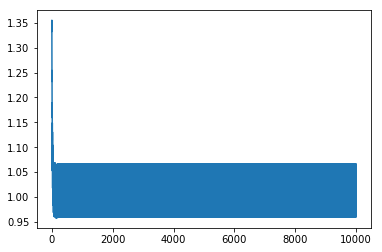

In [15]:
print('xopt =', xopt)
plt.plot(gd_losses)

xopt = [[ 2.52242385]
 [ 4.44054593]]
g1(xopt) = -0.0141035425581
g2(xopt) = -0.668021507682
f(xopt) = 1.03211599441
xtry = [[ 2.52242385]
 [ 4.45464947]]
g1(xtry) = 0.0
g2(xtry) = -0.68212505024
f(xtry) = 1.01720563175


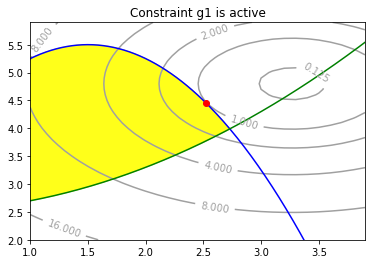

In [17]:
X = np.arange(1, 4, 0.1)
Y = np.arange(2, 6, 0.1)
X, Y = np.meshgrid(X, Y)
nR, nC = X.shape
Z = np.array([[loss(np.array([[X[r,c]],[Y[r,c]]]), c=np.array([[3.27],[4.8]]), m=np.array([[1.5], [1.5]]))
                      for c in range(nC)] for r in range(nR)])

plt.figure()
levels = np.array([0.125, 1, 2, 4, 8, 16, 32])
CS = plt.contour(X, Y, Z, levels, colors=('#A0A0A0'))
plt.clabel(CS, inline=0.5, fontsize=10)
plt.title('Constraint g1 is active')

xminmax = np.min(X), np.max(X)
yminmax = np.min(Y), np.max(Y)

g1 = lambda x: -(x-1.5)**2 + 5.5
g2 = lambda x: 0.2*x**2 + 2.5

x = np.linspace(1, 4, 200)
plt.plot(x, g1(x), 'b')
plt.plot(x, g2(x), 'g')

n = np.sum(g1(x) >= g2(x))
xregion = np.hstack((x[:n],x[n::-1]))
yregion = np.hstack((g1(x[:n]), g2(x[n::-1])))

plt.fill(xregion, yregion, color=(1, 1, 0.1)) 
# plt.plot(x[:n], g1(x[:n]), 'b', linewidth=5)
# plt.plot(x[:n], g1(x[:n]), 'c', linewidth=5)

# plt.plot(xopt[0], xopt[1], 'r*')
# plt.text(xopt[0]+0.02, xopt[1]+0.02, '(%.3f, %.3f)'%(xopt[0], xopt[1]))
print('xopt =', xopt)
print('g1(xopt) =', check_g1(xopt))
print('g2(xopt) =', check_g2(xopt))
print('f(xopt) =', f(xopt))

xtry = xopt.copy()
xtry[1,0] = g1(xopt[0,0])
plt.plot(xtry[0], xtry[1], 'ro')
# plt.text(xtry[0]+0.02, xtry[1]+0.02, '(%.3f, %.3f)'%(xtry[0], xtry[1]))
print('xtry =', xtry)
print('g1(xtry) =', check_g1(xtry))
print('g2(xtry) =', check_g2(xtry))
print('f(xtry) =', f(xtry))


plt.xlim(xminmax)
plt.ylim(yminmax)
plt.show()


KKT

In [18]:
print(xtry)
print('original (1)')
print('g1(x) = ', check_g1(xtry))
print('original (2)')
print('g2(x) = ', check_g2(xtry))
print('Thus, beta2 = 0 (to satisfy KKT3)')

[[ 2.52242385]
 [ 4.45464947]]
original (1)
g1(x) =  0.0
original (2)
g2(x) =  -0.68212505024
Thus, beta2 = 0 (to satisfy KKT3)


In [20]:
# let beta1 = beta2 = 0
# solve Df + beta1 D g1 + beta2 D g2 = 0
xcase1a = np.array([[3.27],[4.8]])

print(check_g1(xcase1a))
print(check_g2(xcase1a))
print('violate g1')

2.4329
-0.16142
violate g1


In [26]:
# let beta1 =0 and beta2 > 0
# solve Df + beta1 D g1 + beta2 D g2 = 0

In [27]:
from sympy.solvers import solve
from sympy import Symbol

In [23]:
x1 = Symbol('x1')
x2 = Symbol('x2')
beta1 = Symbol('beta1')
beta2 = Symbol('beta2')

In [24]:
solve([3*(x1 - 3.27) + 0.4*beta2*x1, 3*(x2-4.8) - beta2, beta2*(-x2 + 0.2*x1**2 + 2.5)])

[{beta2: -0.174662928770235, x1: 3.34796880491982, x2: 4.74177902374325},
 {beta2: 0.0, x1: 3.27000000000000, x2: 4.80000000000000},
 {beta2: -10.8626685356149 - 6.16099190747568*I,
  x1: -1.67398440245991 + 3.06702972581571*I,
  x2: 1.17911048812837 - 2.05366396915856*I},
 {beta2: -10.8626685356149 + 6.16099190747568*I,
  x1: -1.67398440245991 - 3.06702972581571*I,
  x2: 1.17911048812837 + 2.05366396915856*I}]

In [25]:
# ignore complex and previous case (beta1 = beta2 = 0)
# Then, we have beta2 = -0.174663 --> violat beta2 >= 0

In [28]:
# let beta2 = 0
# solve Df + beta1 D g1 + beta2 D g2 = 0
solve([3*(x1 - 3.27) + 2*beta1*(x1 - 1.5), 3*(x2-4.8) + beta1, beta1*(x2 + (x1 - 1.5)**2 - 5.5)])

[{beta1: 0.0, x1: 3.27000000000000, x2: 4.80000000000000},
 {beta1: 1.07912060381198, x1: 2.52942064674132, x2: 4.44029313206267},
 {beta1: -3.08956030190599 - 2.38172909834414*I,
  x1: 0.985289676629338 + 0.77121991088988*I,
  x2: 5.82985343396866 + 0.793909699448046*I},
 {beta1: -3.08956030190599 + 2.38172909834414*I,
  x1: 0.985289676629338 - 0.77121991088988*I,
  x2: 5.82985343396866 - 0.793909699448046*I}]

In [30]:
# beta1: 1.07912060381198, x1: 2.52942064674132, x2: 4.44029313206267
            
# beta1 --> satisfies beta1 > 0
xcase1c = np.array([[2.52942064674132],[4.44029313206267]])

print(check_g1(xcase1c))
print(check_g2(xcase1c))

-1.24344978758e-14
-0.66069937043


In [282]:
x1 = 2.52242385
x2 = 4.45464947
print(-3*(2.52242385 - 3.27)/(2*(2.52242385 - 1.5)))
print(-3*(4.45464947 - 4.8))

1.096770409845193
1.0360515900000005


# Case 2

In [31]:
# 1.2 x1**2 -3 x1 -0.75
coeff = [1.2, -3, -0.75]
x1s = np.roots(coeff)
print(x1s)

[ 2.72901995 -0.22901995]


In [32]:
print(1.2*x1s[0]**2 -3*x1s[0] - 0.75)
print(g1(x1s[0]))
print(g2(x1s[0]))

1.7763568394e-15
3.98950997289
3.98950997289


In [33]:
f = lambda x: loss(x, c=np.array([[3.27],[3.98950997289]]), 
                                                                     m=np.array([[1.5], [1.5]]))
gradf = lambda x: 3*(x - np.array([[3.27], [3.98950997289]])) 

In [34]:
beta = 2
gradf_p1 = lambda x: gradf(x) + beta * dPenalized_g1(x) + beta * dPenalized_g2(x)

# Try gd w/o unconstrains
x0 = np.array([[2.3],[3.98950997289]])
xopt, gd_losses = gd(gradf_p1, x0, f, step_size = 0.01, Nmax = 100)

xopt = [[ 2.73110795]
 [ 3.98950997]]
g1(xopt) = 0.00513676276625
g2(xopt) = 0.00228015638238
f(xopt) = 0.435606958835
xtry = [[ 2.72901995]
 [ 3.98950997]]
g1(xtry) = 1.03880033464e-08
g2(xtry) = 4.60960070114e-09
f(xtry) = 0.438989121747


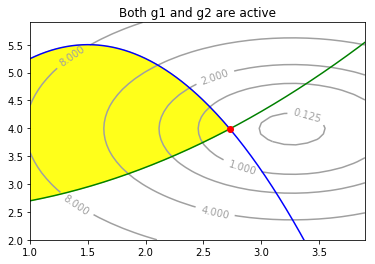

In [35]:
X = np.arange(1, 4, 0.1)
Y = np.arange(2, 6, 0.1)
X, Y = np.meshgrid(X, Y)
nR, nC = X.shape
Z = np.array([[loss(np.array([[X[r,c]],[Y[r,c]]]), c=np.array([[3.27],[3.98950997289]]), m=np.array([[1.5], [1.5]]))
                      for c in range(nC)] for r in range(nR)])

plt.figure()
levels = np.array([0.125, 1, 2, 4, 8, 16, 32])
CS = plt.contour(X, Y, Z, levels, colors=('#A0A0A0'))
plt.clabel(CS, inline=0.5, fontsize=10)
plt.title('Both g1 and g2 are active')

xminmax = np.min(X), np.max(X)
yminmax = np.min(Y), np.max(Y)

g1 = lambda x: -(x-1.5)**2 + 5.5
g2 = lambda x: 0.2*x**2 + 2.5

x = np.linspace(1, 4, 200)
plt.plot(x, g1(x), 'b')
plt.plot(x, g2(x), 'g')

n = np.sum(g1(x) >= g2(x))
xregion = np.hstack((x[:n],x[n::-1]))
yregion = np.hstack((g1(x[:n]), g2(x[n::-1])))

plt.fill(xregion, yregion, color=(1, 1, 0.1)) 
# plt.plot(x[:n], g1(x[:n]), 'b', linewidth=5)
# plt.plot(x[:n], g1(x[:n]), 'c', linewidth=5)

# plt.plot(xopt[0], xopt[1], 'r*')
# plt.text(xopt[0]+0.02, xopt[1]+0.02, '(%.3f, %.3f)'%(xopt[0], xopt[1]))
print('xopt =', xopt)
print('g1(xopt) =', check_g1(xopt))
print('g2(xopt) =', check_g2(xopt))
print('f(xopt) =', f(xopt))

# xtry = xopt.copy()
# xtry[1,0] = g1(xopt[0,0])

xtry = np.array([[2.72901995],[3.98950997289]])
plt.plot(xtry[0], xtry[1], 'ro')
# plt.text(xtry[0]+0.04, xtry[1]-0.2, '(%.3f, %.3f)'%(xtry[0], xtry[1]))
print('xtry =', xtry)
print('g1(xtry) =', check_g1(xtry))
print('g2(xtry) =', check_g2(xtry))
print('f(xtry) =', f(xtry))


plt.xlim(xminmax)
plt.ylim(yminmax)
plt.show()


Case 3

In [36]:
f = lambda x: loss(x, c=np.array([[2],[4]]), 
                                                                     m=np.array([[1.5], [1.5]]))
gradf = lambda x: 3*(x - np.array([[2], [4]])) 

In [37]:
beta = 2
gradf_p1 = lambda x: gradf(x) + beta * dPenalized_g1(x) + beta * dPenalized_g2(x)

# Try gd w/o unconstrains
x0 = np.array([[2.3],[3.98950997289]])
xopt, gd_losses = gd(gradf_p1, x0, f, step_size = 0.01, Nmax = 5000)

Reach termination criteria at i=450 with 0.0000010


xopt = [[ 2.00000032]
 [ 3.99999999]]
g1(xopt) = -1.24999968688
g2(xopt) = -0.699999729079
f(xopt) = 1.58113426691e-13


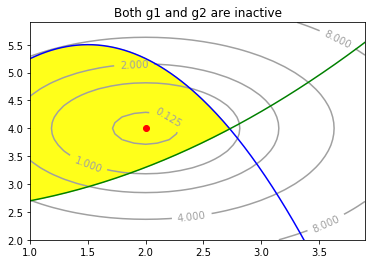

In [39]:
X = np.arange(1, 4, 0.1)
Y = np.arange(2, 6, 0.1)
X, Y = np.meshgrid(X, Y)
nR, nC = X.shape
Z = np.array([[loss(np.array([[X[r,c]],[Y[r,c]]]), c=np.array([[2],[4]]), m=np.array([[1.5], [1.5]]))
                      for c in range(nC)] for r in range(nR)])

plt.figure()
levels = np.array([0.125, 1, 2, 4, 8, 16, 32])
CS = plt.contour(X, Y, Z, levels, colors=('#A0A0A0'))
plt.clabel(CS, inline=0.5, fontsize=10)
plt.title('Both g1 and g2 are inactive')

xminmax = np.min(X), np.max(X)
yminmax = np.min(Y), np.max(Y)

g1 = lambda x: -(x-1.5)**2 + 5.5
g2 = lambda x: 0.2*x**2 + 2.5

x = np.linspace(1, 4, 200)
plt.plot(x, g1(x), 'b')
plt.plot(x, g2(x), 'g')

n = np.sum(g1(x) >= g2(x))
xregion = np.hstack((x[:n],x[n::-1]))
yregion = np.hstack((g1(x[:n]), g2(x[n::-1])))

plt.fill(xregion, yregion, color=(1, 1, 0.1)) 
# plt.plot(x[:n], g1(x[:n]), 'b', linewidth=5)
# plt.plot(x[:n], g1(x[:n]), 'c', linewidth=5)

plt.plot(xopt[0], xopt[1], 'ro')
# plt.text(xopt[0]+0.02, xopt[1]+0.02, '(%.3f, %.3f)'%(xopt[0], xopt[1]))
print('xopt =', xopt)
print('g1(xopt) =', check_g1(xopt))
print('g2(xopt) =', check_g2(xopt))
print('f(xopt) =', f(xopt))

# xtry = xopt.copy()
# xtry[1,0] = g1(xopt[0,0])

# xtry = np.array([[2.72901995],[3.98950997289]])
# plt.plot(xtry[0], xtry[1], 'ro')
# plt.text(xtry[0]+0.04, xtry[1]-0.2, '(%.3f, %.3f)'%(xtry[0], xtry[1]))
# print('xtry =', xtry)
# print('g1(xtry) =', check_g1(xtry))
# print('g2(xtry) =', check_g2(xtry))
# print('f(xtry) =', f(xtry))


plt.xlim(xminmax)
plt.ylim(yminmax)
plt.show()
